In [1]:
from pywaffle import Waffle
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
lith_dict = {'LITH': ['Shale', 'Sandstone', 
                      'Sandstone/Shale', 'Chalk', 
                      'Limestone', 'Marl', 'Tuff'],
             'Well1': [61,15, 10, 5, 
                            5, 3, 1],
             'Well2': [35 ,21, 16, 12, 
                            7, 5, 4]}

lith_data_df = pd.DataFrame.from_dict(lith_dict)

In [8]:
lith_data_df

,LITH,Well1,Well2
0,Shale,61,35
1,Sandstone,15,21
2,Sandstone/Shale,10,16
3,Chalk,5,12
4,Limestone,5,7
5,Marl,3,5
6,Tuff,1,4


In [10]:
colours = ['#8dd3c7', '#deb887', '#bebada', '#fb8072', 
           '#80b1d3', '#fdb462', '#b3de69']

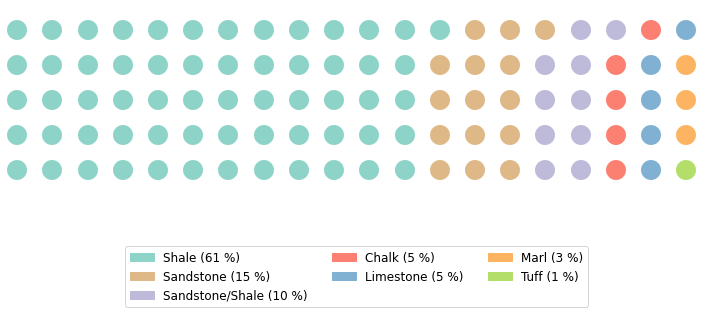

In [66]:
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.Well1)]

plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(lith_data_df['Well1']),
                 colors=colours,
                 labels=plot_labels, 
                icons='circle',
                font_size='20',
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.8), 
                        'ncol':3, 'fontsize':12},
                 starting_location='NW')
plt.show()

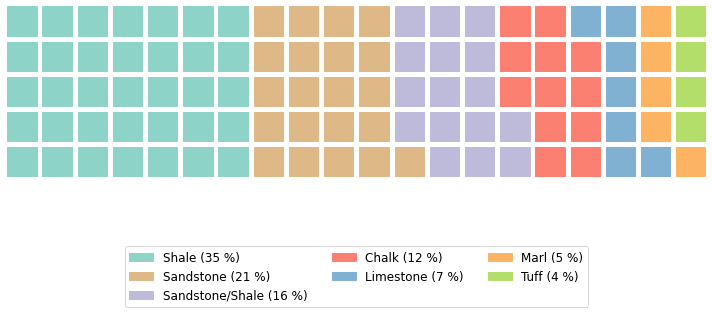

In [44]:
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.Well2)]

fig = plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(lith_data_df['Well2']),
                 colors=colours,
                 labels=plot_labels, 
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.8), 
                        'ncol':3, 'fontsize':12}, rounding_rule='ceil')
plt.show()

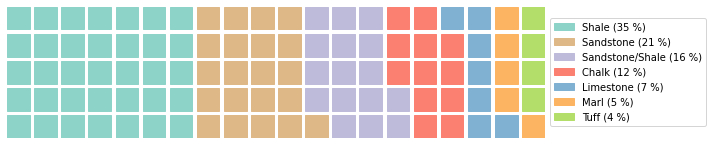

In [97]:
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.Well2)]

fig = plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(lith_data_df['Well2']),
                 colors=colours,
                 labels=plot_labels, 
                legend={'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                        'ncol':1, 'fontsize':10}, rounding_rule='ceil')
plt.show()

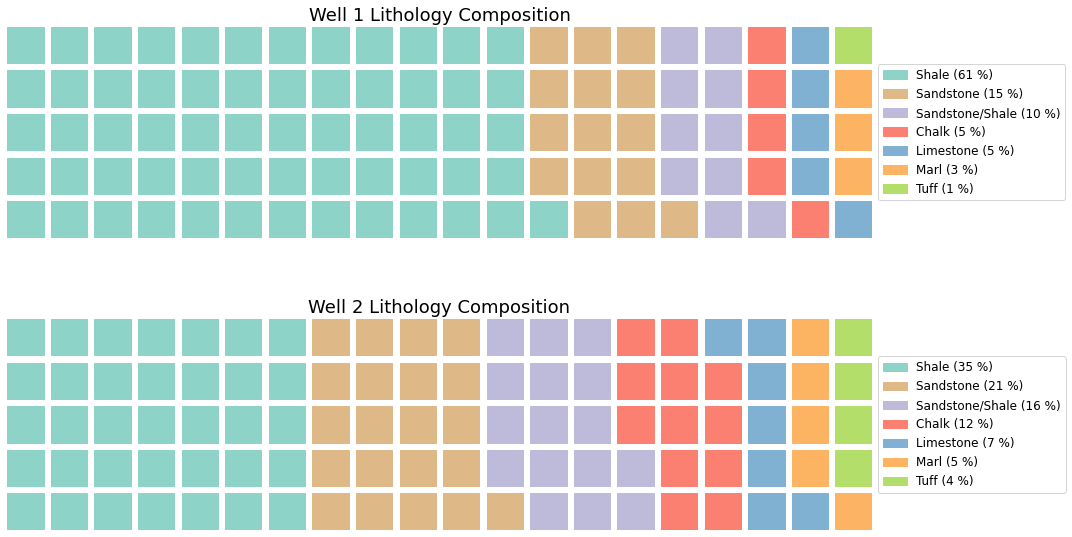

In [120]:
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.Well1)]

fig = plt.figure(FigureClass=Waffle, 
                 plots = {211: {'values':list(lith_data_df['Well1']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                                    lith_data_df.Well1)],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Well 1 Lithology Composition', 'fontsize':18}
                               },
                               
                          212: {
                              'values':list(lith_data_df['Well2']),
                              'labels': [f'{i} ({str(j)} %)' for i,j in zip(lith_data_df.LITH, 
                                         lith_data_df.Well2)],
                              'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                              'title':{'label':'Well 2 Lithology Composition', 'fontsize':18}
                          }
                         },
                 figsize=(15,10), 
                 rows=5, 
                 columns = 20, 
                 colors=colours)
                 
plt.tight_layout()
plt.show()

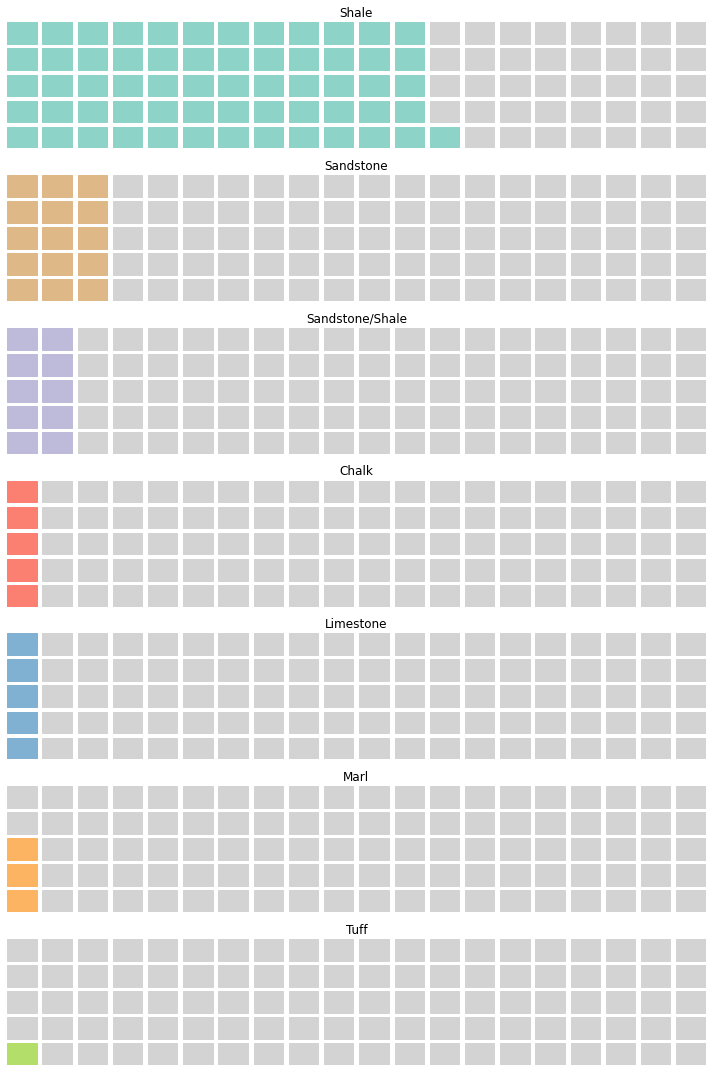

In [50]:
# Set up the colour for unused squares
off_colour = 'lightgrey'

# Figsize numbers must be equal or the height greater than the width
# othewise the plot will appear distorted

fig, axs = plt.subplots(len(lith_data_df), 1, figsize=(10, 15))

for (i, ax), color in zip(enumerate(axs.flatten()), colours):
    plot_colours = [color, off_colour]
    perc = lith_data_df.iloc[i]['Well1']
    values = [perc, (100-perc)]
    lith = lith_data_df.iloc[i]['LITH']
    Waffle.make_waffle(ax=ax, rows=5, columns=20, 
                       values=values, colors=plot_colours)
    
    ax.set_title(lith)
plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['Factory A'] / 1000,  # Convert actual number to a reasonable block number
            'labels': [f"{k} ({v})" for k, v in data['Factory A'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 12}
        },
        312: {
            'values': data['Factory B'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory B'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory B', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'values': data['Factory C'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory C'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory C', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(5, 5)
)

fig.suptitle('Vehicle Production by Vehicle Type', fontsize=14, fontweight='bold')
fig.supxlabel('1 block = 1000 vehicles', fontsize=8, ha='right')
